C'est ton premier checkpoint.
Les 5 exercices sont indépendants. Tu peux donc les effectuer dans l'ordre que tu préfères.

Essaye de finir ce checkpoint en 4h. Si tu n'as pas tout fini, ce n'est pas grave. Tu pourras le reprendre plus tard, tu indiqueras simplement en commentaire ce que tu as fait a posteriori.
Nous t'avons indiqué des durées estimatives. Evidemment chacun a ses forces et ses faiblesses, avance donc à ton rythme. Cependant, si tu vois que tu dépasses une durée, ne reste pas bloqué, passe à l'exercice suivant. Tu pourras revenir à la fin sur ce que tu n'as pas fini.

#SQL - 45 min

A partir de la base de données client que [tu trouveras ici](https://www.w3schools.com/sql/trysql.asp?filename=trysql_op_in), crée une requête SQL qui fournit les noms de chaque catégorie, le chiffre d'affaire associé à cette catégorie, et le prix moyen pondéré des produits vendus pour cette catégorie. 

Le chiffre d'affaire sera arrondi à l'unité la plus proche, et le prix moyen comportera 2 décimales.

Ce tableau devra être trié pour avoir les catégories avec le chiffre d'affaire le plus élevé en premier.

Le code SQL devra être copié / collé dans un bloc de code ci-dessous.



*** Voici les premières lignes attendues ***
*********************

Categories | Chiffre_d_affaire | Prix_moyen
- |:-: | -:
Beverages | 99465 | 43.45
Dairy Products | 69921 | 26.88
... | ... | ...

Le lien précédent te permet de travailler directement dans ton navigateur (Chrome uniquement, ne fonctionne pas sur Firefox). Si tu préfères travailler en local sur MySQL Workbench, [voici un script pour charger la base](
https://github.com/AndrejPHP/w3schools-database/blob/master/w3schools.sql).

In [ ]:
-- Ton code SQL ici :
SELECT c.CategoryName, 
ROUND(SUM(p.Price*od.Quantity)) as Chiffre_d_affaire, 
ROUND(SUM(p.Price*od.Quantity)/SUM(od.Quantity),2) as Prix_moyen
FROM Categories c
JOIN Products p 
ON c.CategoryID=p.CategoryID
JOIN OrderDetails od 
ON p.ProductID=od.ProductID
GROUP BY c.CategoryID
ORDER BY Chiffre_d_affaire DESC;
        

# Tableur - 45 min

Le responsable du reporting mensuel est absent, et il faut absolument envoyer le reporting de chiffre d'affaire (quantité * prix de chaque produit) aujourd'hui... mais impossible de remettre la main sur le fichier du mois dernier !

Heureusement, tu as trouvé comment extraire les données, [tu les trouveras ici.](https://docs.google.com/spreadsheets/d/1T7zh6Swn4Yj8Feu-xcp-B7xeOQfBoBSWn7sRjx07GvI/edit?usp=sharing)

Tu vas maintenant devoir recréer un graphique qui ressemblera au maximum à celui-ci, mais en incluant les données de septembre 2020. Tu en profiteras pour ajouter l'affichage des mois sous les colonnes. Tu essaieras au maximum d'utiliser les tableaux croisés dynamiques pour faire ca.

Tu incluras l'image du graphique dans ce notebook, et tu indiqueras également le lien de ton google spreadsheet que tu auras pris soin de partager.

![Tableur checkpoint](https://github.com/murpi/wilddata/raw/master/checkpoint1_withoutdate.png)

[Lien du tableur](https://docs.google.com/spreadsheets/d/1JqD4CRtFR9yNsqVqixYSQl6kWPdIm3obV8gvIQwyH3A/edit?usp=sharing)

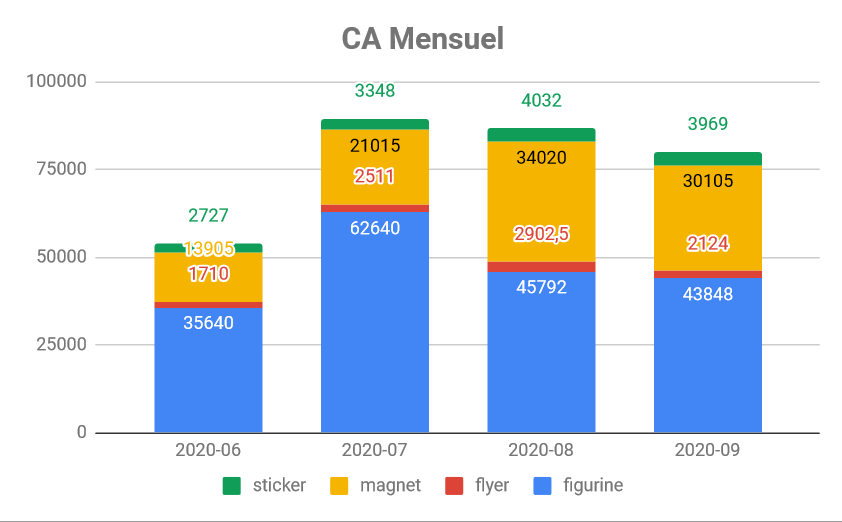

# Python : Algo 1 - 30 min

Un magasin importe des produits américains et les revend sur le marché européen. Il propose à ses clients un discount pour les produits les plus chers (10% de réduction à partir de 500 euros d'achat, 15% à partir de 1000 euros, et 20% à partir de 2000 euros).

Le magasin a une liste de prix en dollars et fait appel à tes services pour déterminer pour chaque prix, le montant que paiera le client en euros (après application de la remise). 


Crée une fonction `dollar_to_euro` qui prend en paramètre un nombre décimal et retourne le montant converti en euro (dans le sens dollar vers euro, prends le taux en vigueur le jour du checkpoint).

In [ ]:
def dollar_to_euro(montant):
  return montant*0.86

Crée une fonction `discount` qui prend en paramètre un nombre décimal et retourne le pourcentage de réduction :
- 0.10 si l'argument est supérieur à 500
- 0.15 si l'argument est supérieur à 1000
- 0.20 si l'argument est supérieur à 2000

In [ ]:
def discount(montant):
  if montant >= 2000:
    return 0.20
  elif montant >= 1000:
    return 0.15
  elif montant >= 500:
    return 0.10
  return 0

Utilise tes deux fonctions pour afficher une phrase pour chacun des montants de cette liste de prix en dollars, indiquant le montant à payer en euros.

In [ ]:
price_list = [256, 1458, 2387, 669, 508, 1365]
for price_dollar in price_list:
  price_euro = dollar_to_euro(price_dollar)
  print(f'Montant à payer (en €) : {round(price_euro - price_euro*discount(price_euro),2)}')

Montant à payer (en €) : 220.16
Montant à payer (en €) : 1065.8
Montant à payer (en €) : 1642.26
Montant à payer (en €) : 517.81
Montant à payer (en €) : 436.88
Montant à payer (en €) : 997.82


# Python : Algo 2 - 1h

Ecris une fonction *monnaie_a_rendre()* qui prend deux arguments obligatoires : 
- montant de l'achat : float, supérieur à 0
- monnaie du client : integer, supérieur à 0

La fonction devra afficher la monnaie à rendre au client en un minimum de billets/pièces. 

Attention, si la monnaie du client est insuffisante (inférieure à l'achat), il faudra l'indiquer.

Exemple : 


```
monnaie_a_rendre(26.57 , 40)
>>> Nb billets 10 euros : 1
>>> Nb pièces 2 euros : 1
>>> Nb pièces 1 euro : 1
>>> Nb pièces 20 cents : 2
>>> Nb pièces 2 cents : 1
>>> Nb pièces 1 cent : 1
```



In [ ]:
# Ta fonction ici :
def monnaie_a_rendre(achat, monnaie):
  if achat > 0 and type(achat)== float and monnaie > 0 and type(monnaie)== int: #Première condition : achat float sup à 0, monnaie entier sup à 0
    reste = monnaie-achat  #calcul du reste à rendre
    if reste > 0: # si le reste est négatif, le client n'a pas donné assez de monnaie
      billetsPieces = [100, 50, 20, 10, 5, 2, 1, 0.5, 0.2, 0.1, 0.02, 0.01]
      nbBilletsPieces = {}
      for i in billetsPieces:
        nbBilletsPieces[i]= reste//i 
        reste = round(reste%i,2)
      return ([f'Nb billets {key} euros : {int(value)}' for key, value in nbBilletsPieces.items() if value != 0 and key >=5] +
             [f'Nb pièces {key} euros : {int(value)}' for key, value in nbBilletsPieces.items() if value != 0 and 1 <= key <=2] +
             [f'Nb pièces {int(100*key)} cents : {int(value)}' for key, value in nbBilletsPieces.items() if value != 0 and key <1])
    return 'Monnaie insuffisante'
  return 'Valeurs non valides'

In [ ]:
# Pour tester :
monnaie_a_rendre(26.57 , 40)

['Nb billets 10 euros : 1',
 'Nb pièces 2 euros : 1',
 'Nb pièces 1 euros : 1',
 'Nb pièces 20 cents : 2',
 'Nb pièces 2 cents : 1',
 'Nb pièces 1 cents : 1']

In [ ]:
#correction pour le message
def billets_piece(key):
    return "Billet" if key>=5 else "Pièce"

def message(dico):
    message = ""
    for k,v in dico.items():
        message += f"Nb {billets_piece(k)} de {k} euro : {int(v)}\n"
    return message

# a mettre dans le return de monnaie_a rendre
# return message(nbBilletsPièces)

#NUMPY - 1h
Exécute le code suivant, puis réponds aux questions.

La matrice contient 12 *colonnes* correspondant chacune à un mois de l'année, et 31 *lignes*. Attention, certaines lignes ont des valeurs `nan` pour les mois de 28 et 30 jours.

In [1]:
# Exécute le code ci-dessous sans rien modifier
import numpy as np
import pandas as pd
temperatures_df = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/temp2019.csv", skiprows = 3)
temperatures_df['jour'] = temperatures_df['DATE'].apply(lambda x: x[8:10])
temperatures_df['mois'] = temperatures_df['DATE'].apply(lambda x: x[5:7])
temperatures_array = temperatures_df.pivot_table(values = 'MAX_TEMPERATURE_C', index = 'jour' , columns='mois').to_numpy()
print("C'est chargé, ta matrice numpy est disponible sous le nom de variable : temperatures_array")

C'est chargé, ta matrice numpy est disponible sous le nom de variable : temperatures_array


In [2]:
temperatures_array

array([[ 9.,  9., 14., 18., 17., 29., 24., 27., 23., 19., 17.,  7.],
       [ 8.,  7., 13., 12., 15., 23., 25., 29., 24., 19., 14.,  7.],
       [ 6.,  8., 14., 10., 15., 20., 26., 29., 26., 19., 14.,  7.],
       [ 5.,  7., 11., 10., 11., 19., 28., 26., 20., 17., 13.,  8.],
       [ 6., 10., 13., 10., 12., 16., 30., 25., 19., 18., 12.,  7.],
       [ 5., 12., 12., 10., 15., 18., 31., 23., 23., 18., 13., 11.],
       [10., 11., 11., 14., 14., 15., 28., 25., 22., 14., 11., 13.],
       [10., 11., 12., 12., 15., 18., 27., 28., 21., 18., 11., 13.],
       [ 7., 12., 13., 16., 15., 16., 25., 23., 17., 16., 10., 11.],
       [ 7., 11., 12., 14., 15., 17., 28., 23., 22., 18., 11., 11.],
       [10., 10., 11., 14., 16., 15., 26., 23., 22., 20., 11.,  9.],
       [ 9., 12., 11., 14., 16., 16., 26., 22., 24., 21., 11., 12.],
       [10., 10., 10., 12., 16., 18., 27., 22., 28., 20.,  9., 10.],
       [10., 13., 11.,  9., 18., 19., 26., 20., 29., 20., 11., 12.],
       [ 9., 15., 13., 14., 18., 1

Questions

In [3]:
# Affiche un array NumPy à partir de l'array "temperatures_array", 
# avec le nombre de jours par mois où la température a été strictement inférieure à 10 degrés.

froid = []
for i in range(temperatures_array.shape[1]):
  froid.append(len(temperatures_array[:,i][temperatures_array[:,i]<10]))
froidArray = np.array(froid)
print(froidArray)

[23  4  0  1  0  0  0  0  0  0  7  7]


In [4]:
# Au total sur l'année, combien y a-t-il eu de jours où la température était supérieure à 20 degrés ?
len(temperatures_array[temperatures_array>20])


101

In [5]:
# Quelle a été la température moyenne du mois de mars ?
np.mean(temperatures_array[:,2])


13.064516129032258

In [6]:
# Quelle a été la température minimale du mois de juin ?
np.nanmin(temperatures_array[:,5])


15.0

# POO (optionnel)


**Programmation orientée objet**

Il t'est demandé de créer une nouvelle classe "sentence" qui va hériter de l'ensemble des méthodes de la classe "str" (*les chaines de caractères que tu connais bien en python*).

Tu devras ajouter une méthode .clean() qui nettoyera les espaces en début et en fin de chaine, mettra en majuscule le premier caractère, et tous les autres caractères en minuscule, et ajoutera un point "." à la fin.

Tu montreras le résultats en appliquant la méthode à la phrase ci-dessous.




In [ ]:
# Tu mettras la création de ta classe ici :
class sentence(str):
  def clean(self):
    cleaned = self.strip().capitalize()
    if cleaned[-1] != '.':
      return cleaned + '.'
    return cleaned



# Ce code permettra de tester :
variable = " bonjour, AUJourd'hui c'EST le cheCKpoint   "
test = sentence(variable)
test.clean()


"Bonjour, aujourd'hui c'est le checkpoint."